<font color="blue" size=5><b>Adaboost</b></font>




In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [4]:
# toy dataset
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

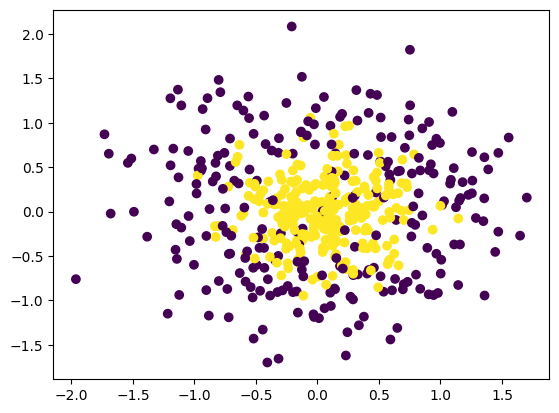

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,X_train,y_train,scoring='accuracy',cv=10))

0.7725

In [7]:
abc.fit(X_train,y_train)

AdaBoostClassifier()

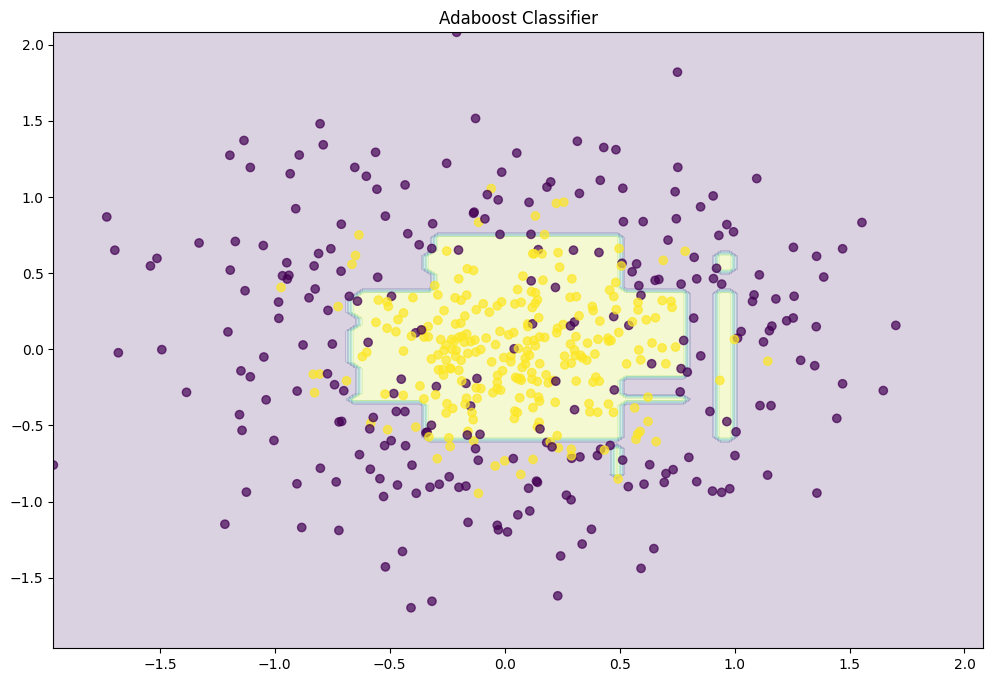

In [8]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()

plot_decision_boundary(abc)

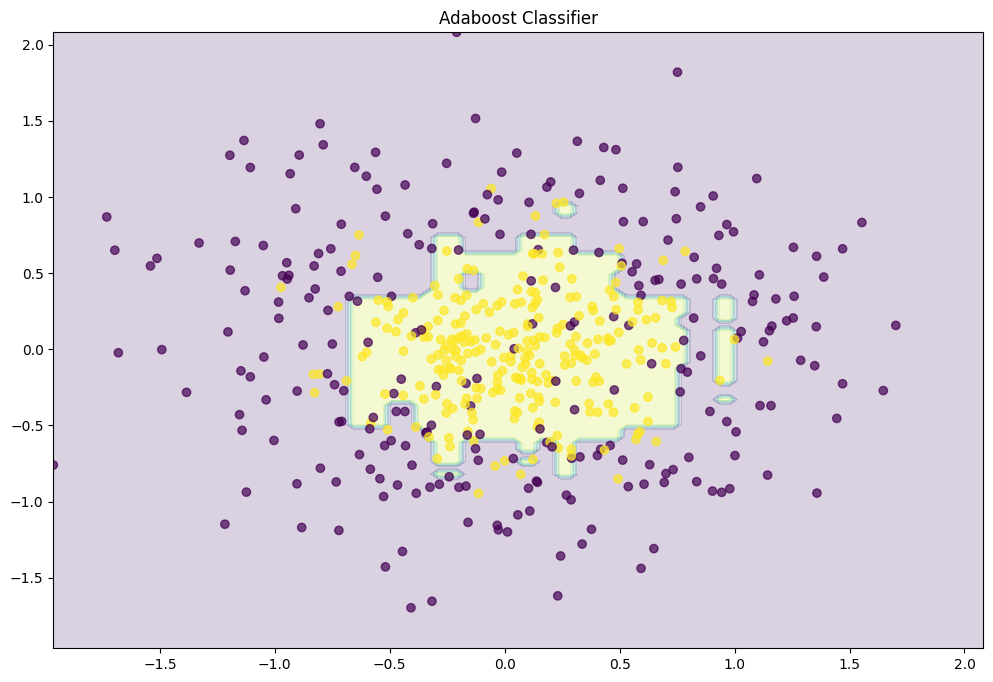

In [9]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
abc.fit(X_train,y_train)
plot_decision_boundary(abc)

In [10]:
accuracy = abc.score(X_test, y_test)
print("Test Accuracy (AdaBoost only):", accuracy)


Test Accuracy (AdaBoost only): 0.81


In [11]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.820000 using {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 500}


In [12]:
best_adaboost = grid_search.best_estimator_
accuracy = best_adaboost.score(X_test, y_test)
print("Test Accuracy (GridSearchCV):", accuracy)

Test Accuracy (GridSearchCV): 0.84
